# T-test


- Test the mean of a sample against a known mean or some other meaningful, fixed value
- 2 sample T-test tests the means of 2 groups
- assumes normal distribution or a large sample
- assumes groups have approximately equal sample
- assumes groups are same size


# Null Hypothesis

- Generally states that there is no statistically significant difference between the 2 groups
- if the p-value is below the alpha, then we reject the null hypothesis

In [1]:
# P-value

In [3]:
import pandas as pd
import numpy as np

np.random.seed(0) #wait to control random data and for it to be consistent

In [4]:
def decimal_str(x: float, decimals: int = 10) -> str:
    return format(x, f".{decimals}f").lstrip().rstrip('0')

def interpret(alpha, p_val):
    print(f"Probability results occurred by chance: {decimal_str(p_val, 30)}.\nIs our p-value less than the alpha? {'Yes. We reject the null hypothesis! Kill it with fire!' if p_val < alpha else 'No. Our null hypothesis is correct.'}")
    
def roll(x):
    fair = [1,2,3,4,5,6]
    unfair = [6,2,3,4,5,6]
    return np.random.choice(fair if x == 'fair' else unfair)

In [5]:
r = 1000
df = pd.DataFrame({
    'A_1d': [roll('fair') for _ in range(r)],
    'A_2d': [roll('fair') for _ in range(r)],
    'A_3d': [roll('fair') for _ in range(r)],
    
    'B_1d': [roll('fair') for _ in range(r)],
    'B_2d': [roll('fair') for _ in range(r)],
    'B_3d': [roll('fair') for _ in range(r)]
})

df.head()

,A_1d,A_2d,A_3d,B_1d,B_2d,B_3d
0,5,2,5,6,3,3
1,6,5,4,1,5,3
2,1,3,4,1,6,2
3,4,2,3,1,1,6
4,4,5,3,5,2,4


In [6]:
df['A'] = df['A_1d'] + df['A_2d'] + df['A_3d'] 
df['B'] = df['B_1d'] + df['B_2d'] + df['B_3d'] 
df.head()

,A_1d,A_2d,A_3d,B_1d,B_2d,B_3d,A,B
0,5,2,5,6,3,3,12,12
1,6,5,4,1,5,3,15,9
2,1,3,4,1,6,2,8,9
3,4,2,3,1,1,6,9,8
4,4,5,3,5,2,4,12,11


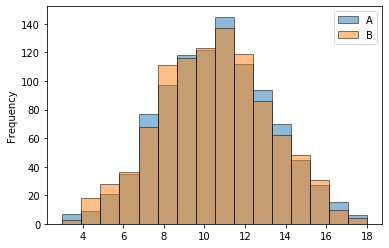

In [8]:
df[['A', 'B']].plot(
    bins = 16,
    kind = 'hist',
    alpha = 0.5, #transparency
    edgecolor = 'black'

)

In [9]:
# One sample t - testing



In [10]:
from scipy.stats import ttest_1samp

In [22]:
expected_mean = 10.5

p_val = ttest_1samp(
    df['A'],
    expected_mean
)[1]

p_val

0.38288615747961274

In [23]:
#Should we reject our null hypothesis
#NO
alpha = 0.05
interpret(alpha, p_val)

Probability results occurred by chance: 0.382886157479612743159691490291.
Is our p-value less than the alpha? No. Our null hypothesis is correct.


In [24]:
p_val_B = ttest_1samp(
    df['B'],
    expected_mean
)[1]

p_val #THIS IS WRONG

0.38288615747961274

In [20]:
alpha = 0.05
interpret(alpha, p_val_B) #REVIEW

Probability results occurred by chance: 0.617649434970490185392577586754.
Is our p-value less than the alpha? No. Our null hypothesis is correct.


#Confidence intervals
CI - Gives us info about the true mean of the population
95% CI means we are 95% sure that the mean of the population is within the CI
If the p value is < than alpha, the ci WILL NOT CONTAIN THE HYPOTHEZIDED MEAN

In [26]:
from scipy.stats import t, sem #standard error of the mean

In [27]:
sample = df.sample(n = 100)['A']
sample.std()

2.544373868722595

In [28]:
standard_error = sem(sample) #likelyhood that the mean of the sample is a representative of the whole population(data)
standard_error

0.2544373868722595

In [29]:
# t.interval

In [31]:
lower, upper = t.interval(
    1 - alpha, #confidence level
    len(sample) - 1, #degrees of freedom
    loc = sample.mean(), #sample MEAN
    scale= sem(sample) #sample SEM
)

lower, upper

(9.96514102387049, 10.97485897612951)

In [32]:
lower <= df['A'].mean() <= upper

True

# TWO SAMPLE T-TESTING
- Assumes equal variance

# Variance
- Average of the squared differences from the mean

# STANDARD DEVIATION

- Measures how far from the mean a group of numbers is, by using the square root of the variance

In [34]:
round(df['A'].std()) == round(df['B'].std())

True

In [35]:
from scipy.stats import ttest_ind # independent samples

p_val = ttest_ind(
    df['A'],
    df['B'],
    equal_var = True # spread between numbers in data set
)[1]

p_val #wrong

0.33232372591362713

In [36]:
#if we did not know the variance, same thing but false
p_val = ttest_ind(
    df['A'],
    df['B'],
    equal_var = False # spread between numbers in data set
)[1]

p_val

0.332323729128434

In [37]:
interpret(alpha, p_val)

Probability results occurred by chance: 0.332323729128433997814795475279.
Is our p-value less than the alpha? No. Our null hypothesis is correct.


In [38]:
#Testing related samples

#2 sided test for the nh that 2 related or repeated samples have identical average(expected) values

In [39]:
from scipy.stats import ttest_rel

p_val = ttest_rel(df['A_1d'], df['A_3d'])[1] #compare first to 3rd die
p_val

0.48075155783370493

In [40]:
interpret(alpha, p_val)

Probability results occurred by chance: 0.480751557833704934452612178575.
Is our p-value less than the alpha? No. Our null hypothesis is correct.


In [41]:
p_val = ttest_rel(df['B_1d'], df['B_3d'])[1] #compare first to 3rd die # WRONG VALUE
p_val

0.9896668184541415

In [42]:
interpret(alpha, p_val)

Probability results occurred by chance: 0.989666818454141505867482919712.
Is our p-value less than the alpha? No. Our null hypothesis is correct.


In [43]:
#Proportions Testing
#Set of observations, and we know the avg outcome. 
#used when we want to test wether the 

In [44]:
sample = df.sample(n = 100)
sample.head()

,A_1d,A_2d,A_3d,B_1d,B_2d,B_3d,A,B
640,6,3,6,1,1,2,15,4
55,5,4,4,3,6,5,13,14
666,1,4,3,1,6,5,8,12
88,3,3,6,2,2,3,12,7
806,5,6,1,2,1,1,12,4


In [45]:
a_six = sample.query('A_1d == 6 or A_2d == 6 or A_3d == 6').shape[0]
a_six

35

In [46]:
prob_a_six = a_six / sample.shape[0] #probability that player A rolls a 6
prob_a_six

0.35

In [47]:
b_six = sample.query('B_1d == 6 or B_2d == 6 or B_3d == 6').shape[0] #REVIEW
b_six

45

In [48]:
from statsmodels.stats.proportion import proportions_ztest

In [49]:
p_val = proportions_ztest(
    b_six, #number of times B rolled a six
    sample.shape[0], # number of total observations
    prob_a_six #probability to which we are comparing B's rolls 
)[1] / 2
p_val

0.022211592425002993

In [50]:
interpret(alpha, p_val)

Probability results occurred by chance: 0.022211592425002993356208946807.
Is our p-value less than the alpha? Yes. We reject the null hypothesis! Kill it with fire!
